In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [136]:
df_tesla = pd.read_csv('/content/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/UE Benefits Search vs UE Rate 2004-19.csv')

In [104]:
df_tesla.shape
print("No of columns = 3")
print("No of rows = 124")

No of columns = 3
No of rows = 124


In [105]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [106]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [107]:
largest_value_id = df_tesla['TSLA_WEB_SEARCH'].idxmax()
largest_value = df_tesla['TSLA_WEB_SEARCH'].loc[largest_value_id]
smallest_value_id = df_tesla['TSLA_WEB_SEARCH'].idxmin()
smallest_value = df_tesla['TSLA_WEB_SEARCH'].loc[smallest_value_id]


In [108]:
print(f'Largest value for Tesla in Web Search: {largest_value} ')
print(f'Smallest value for Tesla in Web Search: {smallest_value}')

Largest value for Tesla in Web Search: 31 
Smallest value for Tesla in Web Search: 2


In [109]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [110]:
print(pd.infer_freq(df_tesla['MONTH']))

MS


In [111]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [112]:
df_unemployment.shape
print("No of columns = 3")
print("No of rows = 181")

No of columns = 3
No of rows = 181


In [113]:
df_unemployment.columns

Index(['MONTH', 'UE_BENEFITS_WEB_SEARCH', 'UNRATE'], dtype='object')

In [114]:
largest_value_ep = df_unemployment['UE_BENEFITS_WEB_SEARCH'].max()
smallest_value_ep = df_unemployment['UE_BENEFITS_WEB_SEARCH'].min()

In [115]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {largest_value_ep} ')
print(f"Smallest value for Unemployemnt Benefits in Web Search : {smallest_value_ep}")

Largest value for "Unemployemnt Benefits" in Web Search: 100 
Smallest value for Unemployemnt Benefits in Web Search : 14


In [116]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [117]:
df_btc_search.shape
print("No of columns = 2")
print("No of rows = 73")

No of columns = 2
No of rows = 73


In [118]:
df_btc_search.columns

Index(['MONTH', 'BTC_NEWS_SEARCH'], dtype='object')

In [119]:
df_btc_search.describe()


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [120]:
largest_value_btc= df_btc_search['BTC_NEWS_SEARCH'].max()
smallest_value_btc = df_btc_search['BTC_NEWS_SEARCH'].min()

In [121]:
print(f'largest BTC News Search: {largest_value_btc}')
print(f"smallest BTC News Search: {smallest_value_btc}")

largest BTC News Search: 100
smallest BTC News Search: 3


In [122]:
df_tesla.isna().values.any()

False

In [123]:
df_unemployment.isna().values.any()

False

In [124]:
df_btc_search.isna().values.any()

False

In [125]:
print(df_btc_price.isna().values.any())
print(df_btc_price.isna().values.sum())

True
2


In [126]:
print(f'Missing values for Tesla?: fales ')
print(f'Missing values for U/E?: false ')
print(f'Missing values for BTC Search?: false ')

Missing values for Tesla?: fales 
Missing values for U/E?: false 
Missing values for BTC Search?: false 


In [127]:
print(f'Missing values for BTC price?: true ')

Missing values for BTC price?: true 


In [128]:
print(f'Number of missing values: 2')

Number of missing values: 2


In [129]:
df_btc_price =df_btc_price.dropna(inplace =  True)

In [130]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla.MONTH)
df_tesla.dtypes

MONTH              datetime64[ns]
TSLA_WEB_SEARCH             int64
TSLA_USD_CLOSE            float64
dtype: object

In [131]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment.MONTH)
df_unemployment.dtypes

MONTH                     datetime64[ns]
UE_BENEFITS_WEB_SEARCH             int64
UNRATE                           float64
dtype: object

In [132]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [139]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [140]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()


In [141]:
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [154]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

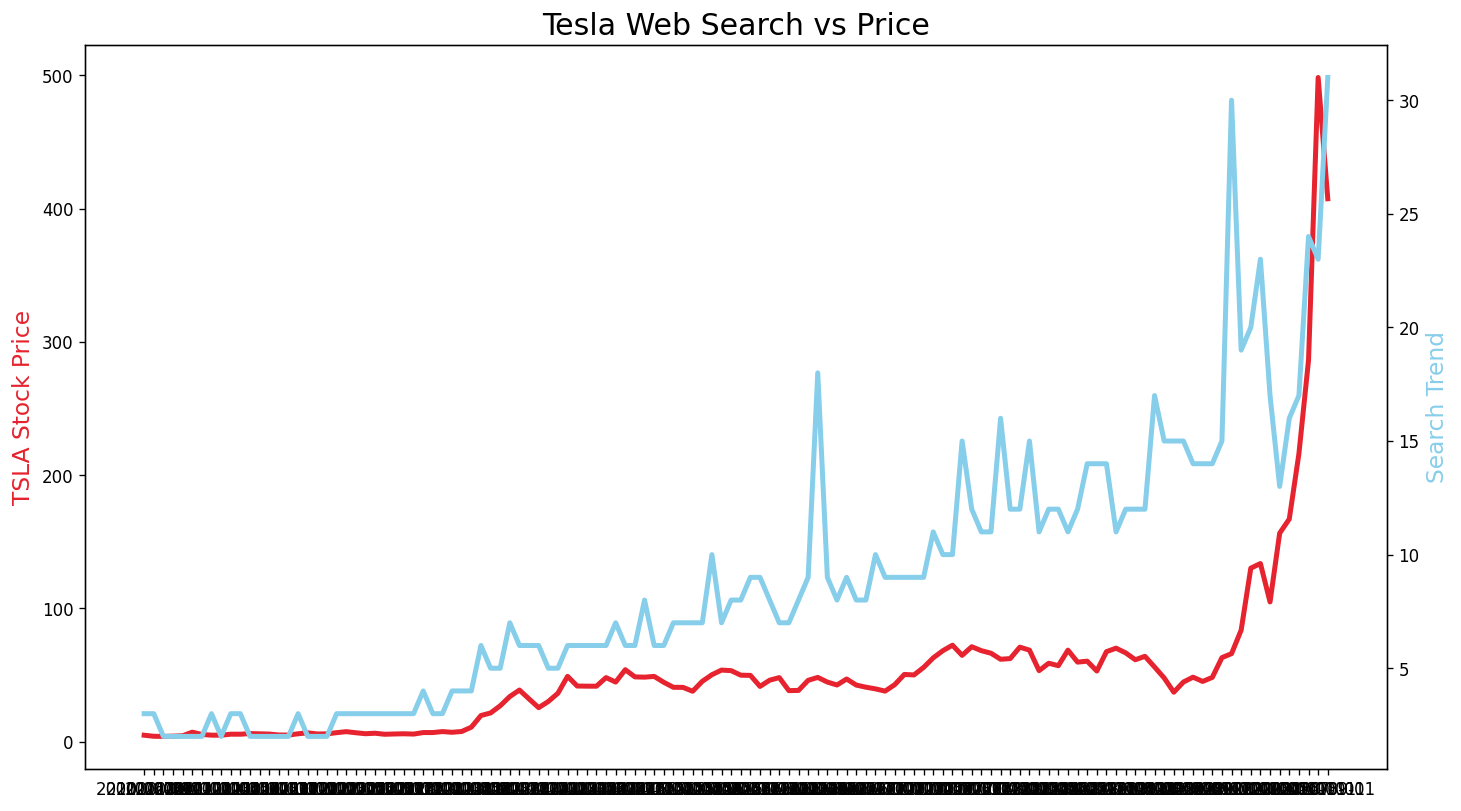

In [158]:
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('TSLA Stock Price', color='#E6232E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#E6232E', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()


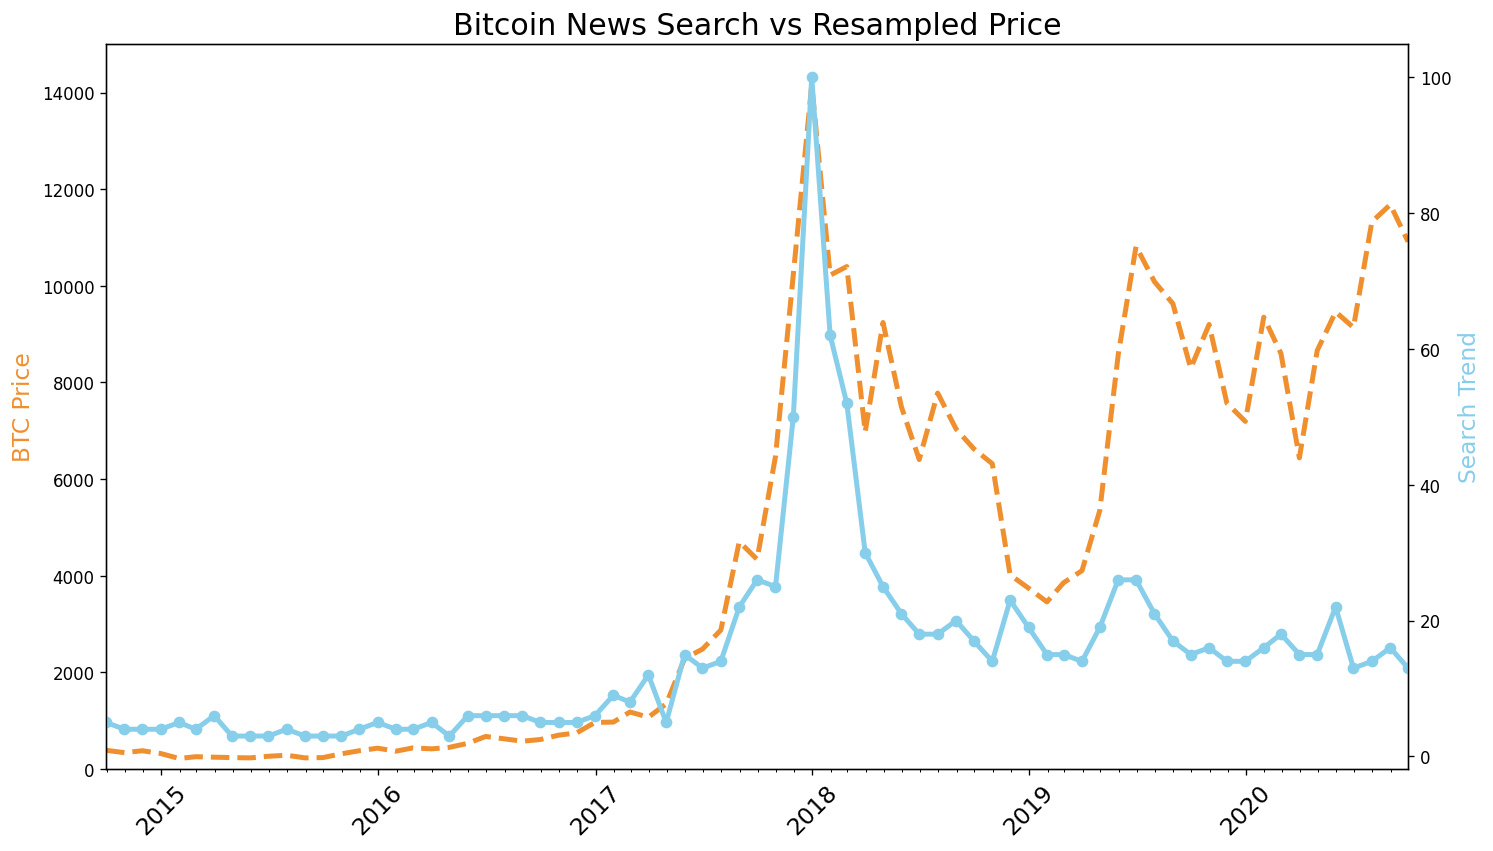

In [159]:
plt.figure(figsize=(14,8), dpi=120)
 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])
 
# Experiment with the linestyle and markers
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, 
         color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, 
         color='skyblue', linewidth=3, marker='o')
 
plt.show()

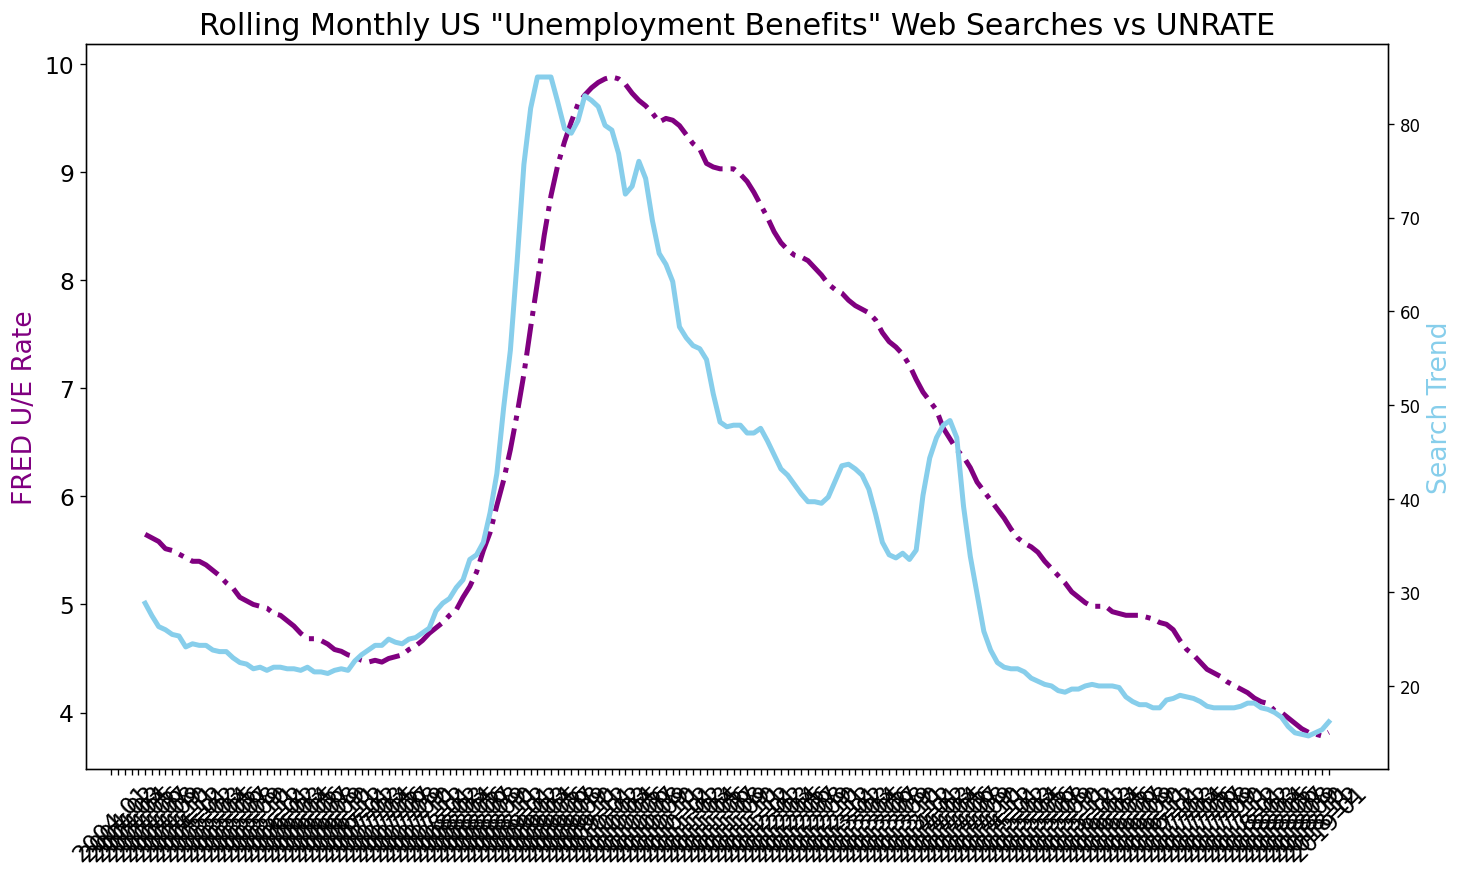

In [165]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
 
# Calculate the rolling average over a 6 month window
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()